# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
import json
import requests
from api_keys import weather_api_key,g_key
import random 
import pandas as pd 
import time 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
from citipy import citipy 
import csv
import urllib
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [17]:
cities = []

while len(cities) < 650:
    lat = random.choice(range(-90,90))
    long = random.choice(range(-180,180))
    city = citipy.nearest_city(lat,long).city_name
    if city not in cities:
        cities.append(city)

len(cities)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=ed3bf421d7f1d280966f00c1b0c03bd4&units=metric'

In [19]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        latitute = city_weather["coord"]["lat"]
        longitude = city_weather["coord"]["lon"]
        max_temperature = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": latitute, 
                          "Lng": longitude, 
                          "Max Temp": max_temperature,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found...Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | lianzhou
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | sri aman
Processing Record 7 of Set 1 | labuhan
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | novyy urengoy
Processing Record 10 of Set 1 | barentsburg
City not found...Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | trincomalee
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | ornskoldsvik
Processing Record 17 of Set 1 | mount isa
Processing Record 18 of Set 1 | mackay
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | fujin
Processi

Processing Record 38 of Set 4 | egvekinot
Processing Record 39 of Set 4 | piet retief
Processing Record 40 of Set 4 | henties bay
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | bandarbeyla
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | monster
Processing Record 46 of Set 4 | upington
Processing Record 47 of Set 4 | odienne
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | pimentel
Processing Record 0 of Set 5 | mulege
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | dauphin
Processing Record 3 of Set 5 | vila franca do campo
Processing Record 4 of Set 5 | amalapuram
Processing Record 5 of Set 5 | dalvik
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | luderitz
Processing Record 8 of Set 5 | xai-xai
Processing Record 9 of Set 5 | pokaran
Processing Record 10 of Set 5 | ozgon
City not found...Skipping...
Processing Record 11 of Set 5 |

Processing Record 24 of Set 8 | port hedland
Processing Record 25 of Set 8 | mbanza-ngungu
Processing Record 26 of Set 8 | catanduva
Processing Record 27 of Set 8 | yomitan
City not found...Skipping...
Processing Record 28 of Set 8 | maceio
Processing Record 29 of Set 8 | cherepanovo
Processing Record 30 of Set 8 | nanhai
Processing Record 31 of Set 8 | aykhal
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | zhuanghe
Processing Record 34 of Set 8 | progreso
Processing Record 35 of Set 8 | lincoln
Processing Record 36 of Set 8 | muli
Processing Record 37 of Set 8 | aripuana
Processing Record 38 of Set 8 | nanakuli
Processing Record 39 of Set 8 | vanino
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | shalinskoye
Processing Record 42 of Set 8 | mahon
Processing Record 43 of Set 8 | college
Processing Record 44 of Set 8 | pedernales
Processing Record 45 of Set 8 | ulladulla
Processing Record 46 of Set 8 | atar
Processing Record 47 of Set 8 | aw

Processing Record 13 of Set 12 | khislavichi
Processing Record 14 of Set 12 | yian
City not found...Skipping...
Processing Record 15 of Set 12 | udachnyy
Processing Record 16 of Set 12 | camara de lobos
Processing Record 17 of Set 12 | bad wildungen
Processing Record 18 of Set 12 | leningradskiy
Processing Record 19 of Set 12 | sengiley
Processing Record 20 of Set 12 | xam nua
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | mecca
Processing Record 23 of Set 12 | taltal
Processing Record 24 of Set 12 | gao
Processing Record 25 of Set 12 | elk city
Processing Record 26 of Set 12 | nizhniy kuranakh
Processing Record 27 of Set 12 | miram shah
Processing Record 28 of Set 12 | uberlandia
Processing Record 29 of Set 12 | kandrian
Processing Record 30 of Set 12 | beloha
Processing Record 31 of Set 12 | kariba
Processing Record 32 of Set 12 | morondava
Processing Record 33 of Set 12 | zhaodong
Processing Record 34 of Set 12 | shitanjing
Processing Record 35 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_data_df = pd.DataFrame(city_data)

# Export the city_data_df into a csv
city_data_df.to_csv("../output_data/WeatherPy.csv",encoding="utf-8",index=False)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,13.86,69,96,6.89,RU,1627096567
1,albany,42.6001,-73.9662,17.18,87,0,1.65,US,1627096436
2,lianzhou,24.7811,112.3825,32.17,59,60,2.99,CN,1627096698
3,tuktoyaktuk,69.4541,-133.0374,12.10,54,27,6.84,CA,1627096445
4,atuona,-9.8000,-139.0333,25.24,77,41,4.82,PF,1627096420


In [21]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,19.145835,20.528788,20.688868,70.337838,52.532095,3.731166,1.627097e+09
std,33.558011,90.356919,8.006798,20.182938,40.091633,2.827318,1.042273e+02
min,-54.800000,-179.166700,-2.550000,8.000000,0.000000,0.000000,1.627096e+09
25%,-9.121250,-59.520850,15.115000,59.750000,7.000000,1.700000,1.627097e+09
50%,21.414450,23.678100,21.520000,74.000000,60.000000,3.090000,1.627097e+09
75%,47.525050,100.529125,27.090000,85.000000,93.000000,5.140000,1.627097e+09
max,78.218600,178.416700,36.900000,100.000000,100.000000,16.460000,1.627097e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

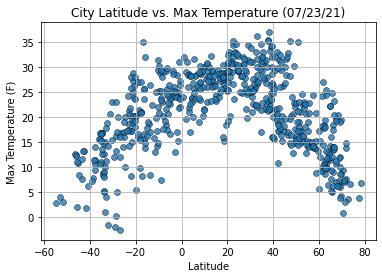

In [23]:
# Build scatter plot 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Temperature.png")

# Show plot
plt.show()

Temperature is maximum between the latitude of 0- 40

## Latitude vs. Humidity Plot

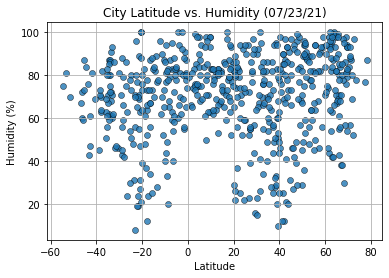

In [24]:

# Build the scatter plots 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Humidity.png")

# Show plot
plt.show()

As the latitude increases, humidity is also increased

## Latitude vs. Cloudiness Plot

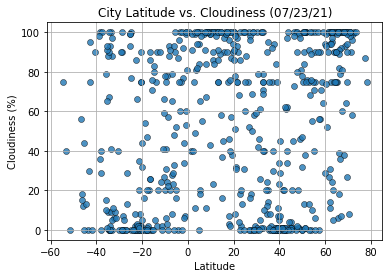

In [25]:
# Build the scatter plots 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Cloudiness .png")

# Show plot
plt.show()

Data is wide spread for Latitude vs Cloudiness

## Latitude vs. Wind Speed Plot

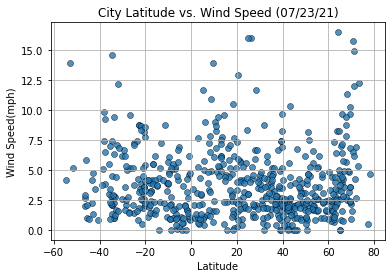

In [26]:
# Build the scatter plots 
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Latitude vs Wind Speed .png")

# Show plot
plt.show()

Wind data is spread across the latitude

## Linear Regression

In [27]:
n_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
s_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

In [37]:
# Defining Functions
def linear_agression(x_axis,y_axis):
    print(f"The r-value is : {round(st.pearsonr(x_axis, y_axis)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis,regress_values,"r-")
    return line_eq


def annotate(line_eqa, a, b):
    plt.annotate(line_eqa,(a,b),fontsize=10,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.68


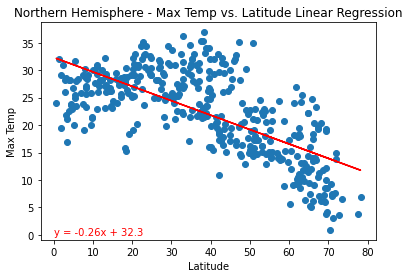

In [41]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Max Temp"])
annotate(equation, 0, 0)

#properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a negative corelation between latitude and maximum temperature in northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.66


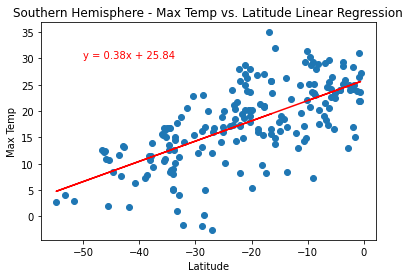

In [42]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Max Temp"])
annotate(equation, -50, 30)

#properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a positive corelation between latitude and maximum temperature in southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.03


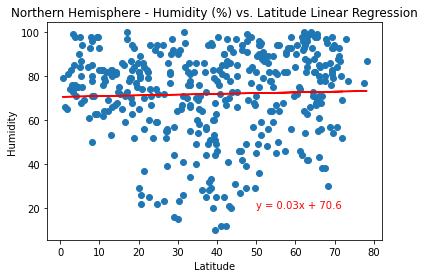

In [43]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Humidity"])
annotate(equation, 50, 20)

#properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a weak positive corelation between latitude and humidity temperature in northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.08


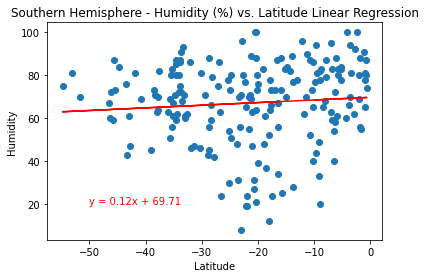

In [44]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Humidity"])
annotate(equation, -50, 20)

#properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a weak positive corelation between latitude and humidity temperature in southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.0


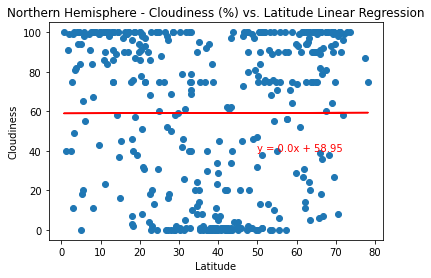

In [46]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Cloudiness"])
annotate(equation, 50, 40)

#properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak corelation between latitude and cloudiness in northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.13


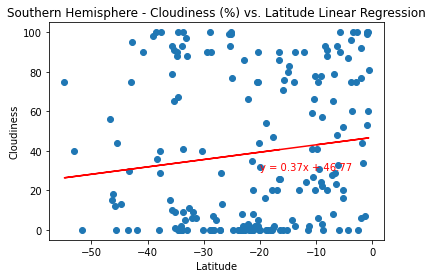

In [48]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Cloudiness"])
annotate(equation, -20, 30)

#properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a positive corelation between latitude and cloudiness in southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.01


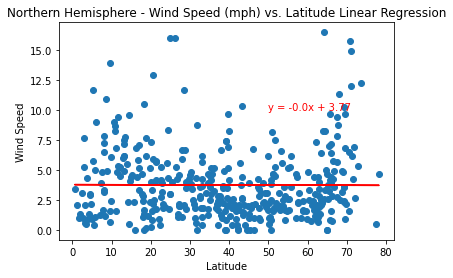

In [50]:
#Calling Function
equation = linear_agression(n_hemisphere["Lat"], n_hemisphere["Wind Speed"])
annotate(equation, 50, 10)

#properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a weak corelation between latitude and wind speend in northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.23


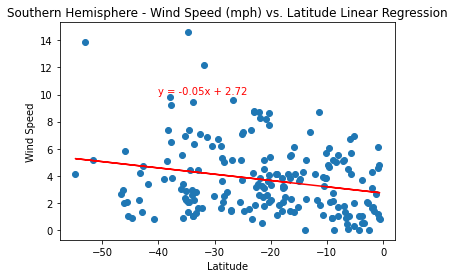

In [51]:
#Calling Function
equation = linear_agression(s_hemisphere["Lat"], s_hemisphere["Wind Speed"])
annotate(equation, -40, 10)

#properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a negative corelation between latitude and wind speend in southern hemisphere